# Please install the following python libraries
- python3: https://www.python.org/
- numpy: https://numpy.org/install/
- tqdm: https://github.com/tqdm/tqdm#installation
- matplotlib: https://matplotlib.org/stable/users/installing/index.html

If you encounter the error: "IProgress not found. Please update jupyter & ipywidgets"
    
Please install the ipywidgets as follows:

    with pip, do
    - pip install ipywidgets
    
    with conda, do
    - conda install -c conda-forge ipywidgets
    
Restart your notebook 

## Implement Deep Neural Networks using Pytorch.

In this exercise, we will use the Pytorch library (https://pytorch.org/) to build and train our deep neural networks. In the deep learning literature, especially in the research community, Pytorch is SUPER popular due to its automatic differentiation and dynamic computational graph (i.e., the graph is automatically generated, which is different from tensorflow where you have to define them beforehand). Briefly spearking, using Pytorch, you only have to build your neural network, define the forward pass, and the loss function. The library will automatically compute the weights and perform the backpropagation for you. For more details about Pytorch, we recommend you check the tutorails on the offical website to learn the basics (https://pytorch.org/tutorials/). 

Please try to learn the basics as much as you can. If you have any questions, feel free to ask them on Piazza or TA hours. 

## Please install the Pytorch library on your computer before you run this notebook.

The installation instructions can be found here. (https://pytorch.org/get-started/locally/)

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

import tqdm
import random
import gym
import numpy as np
import matplotlib.pyplot as plt

# Q1: Nonlinear Function Approximation with Neural Networks

We design this question to help you get familiar with the basics in the Pytorch library. Please read the question carefully in the problem set because we will focus more on Pytorch implementation here.

### Preparing the training set

First, we create a training set to train the neural network model. Specifically, the dataset contains N training samples. For each sample, it is represented as (x, y), where x is input to the non-linear function "f(x) = 1 + x^2" and y is the output value. 

We provide a scaffolding code below to generate a training set that contains N samples for a particular non-linear function. Please complete the function below

In [2]:
""" Function is used to create a dataset that contains "num" samples given a particular non-linear function.
    In this case, the non-linear function is f(x) = 1 + x ^ 2.
""" 
def create_dataset(num, start_val, end_val):
    """ Function that generates a dataset 
        
        Args:
            num (int): number of samples to generate
            start_val (float): the minimal value of x (included)
            end_val (float): the maximal value of x (included)
    
        Returns:
            dataset (list): a list consists of (x, y) pairs.
    """
    def nonlinear_function(val):
        """ CODE HERE: non-linear function: 1 + val ^ 2
        """
        return 1 + val ** 2

    """ CODE HERE: 
        - create "num" even values between start_val and end_val using numpy.linspace
        - create the dataset, which is a list of training tuples. e.g. (x, y)
    """
    X = np.linspace(start_val, end_val, num=num)
    Y = [nonlinear_function(x) for x in X]
    dataset = list(zip(X, Y))
    return dataset

### Construct the neural network using Pytorch

Here, we will define a Neural Network using the Pytorch library. 

In [3]:
""" Normally, using Pytorch, we will implement the Neural Network as a class.

    Basically, we have to do the following steps:
        - Inherit from the torch.nn.Module that contains the basics of Neural Networks in Pytorch.
        - Define the architecture of the Neural Network in the "def __init__() function"
            e.g., you can find the functions to create layers with different types under torch.nn. 
                  for example, we can build one linear layer use torch.nn.Linear() as follows. 
        - Define how you would like to perform a forward propagation using you neural network in the 
          "def forward()""
"""
class NeuralNet(nn.Module):
    def __init__(self, num_hidden_layer, dim_hidden_layer):
        """ Args:
                num_hidden_layer (int): number of the hidden layers
                dim_hidden_layer (int): dimension for each hidden layer. You can use different dimensions for
                                        different layers. But, we use the same dimension for all hidden layers
                                        just for simplicity. 
                                        
            In this exercise, you are asked to design a 4-layers (2 hidden layers) fully connected neural network.
        """
        super(NeuralNet, self).__init__()
        
        # define the input dimension
        self.input_dim = 1

        # define the number of the hidden layers
        self.hidden_num = num_hidden_layer

        # define the hidden dimension
        self.hidden_dim = dim_hidden_layer

        # define the output dimension
        self.output_dim = 1

        """ CODE HERE:
            Create a fully connected neural network here
        """
        # define the input linear layer here
        self.input = nn.Linear(self.input_dim, self.hidden_dim)
        # define the activation function after the input layer (use the ReLU as the activation function)
        self.fc0 = nn.ReLU()
        # define the first hidden layer here
        self.hl0 = nn.Linear(self.hidden_dim, self.hidden_dim)
        # define the activation function after the first hidden layer (use the ReLU as the activation function)
        self.fc1 = nn.ReLU()
        # define the second hidden layer here
        self.hl1 = nn.Linear(self.hidden_dim, self.hidden_dim)
        # define the activation function after the second hidden layer (use the ReLU as the activation function)
        self.fc2 = nn.ReLU()
        # define the output layer here
        self.output = nn.Linear(self.hidden_dim, self.output_dim)

    def forward(self, x):
        """ Function that defines the forward propagation 
        """
        
        """ CODE HERE:
            Implement each forward propagation using the corresponding layers you defined above.
        """
        # forward x through the input layer
        x = self.input(x)
        # apply activation
        x = self.fc0(x)
        # forward x throught the first hidden layer
        x = self.hl0(x)
        # apply activation
        x = self.fc1(x)
        # forward x throught the second hidden layer
        x = self.hl1(x)
        # apply activation
        x = self.fc2(x)
        # forward x throught the output layer
        y = self.output(x)
        return y

### Implement the training process

Here, we provide you the scaffolding code to train the Neural Network. Using Pytorch, you have to learn to perform 3 essential steps:

1. Sample a training batch
2. Perform a forward propagation. In other words, given the sampled batch data, compute the prediction values using your Neural Network.
3. Perform one step backpropagation. The gradients computation and the backpropagation are done automatically by Pytorch, which is the key reason that it is popular. 

In [4]:
""" We implement a class to train a neural network
"""
class NeuralNetTrainer(object):
    def __init__(self, dataset, network_model, params):
        """ To train a Neural Network, we need:
                - The training set
                - The Neural Network model
                - A Loss function
                - An Optimizer
                - other parameters
            Thanks to Pytorch, we can use the built-in Loss function and the Optimizer.
            
            Args:
                dataset (list): a list contains all training data
                network_model (nn.Module): a Pytorch defined neural network
                params (dict): a dictionary stores the training parameters
        """
        # Dataset 
        self.dataset = dataset
        # We can specify the device to train the model: cpu or GPU
        self.device = torch.device(params['device'])
        # Send the model to the device
        self.model = network_model.to(self.device)

        """ CODE HERE:
                - Create the ADAM optimizer
                - MSE loss 
        """
        # Define the Adam optimizer with specified leaarning rate and weight decay in "params"
        self.optimizer = torch.optim.Adam(self.model.parameters(), lr=params['learning_rate'])
        # We use a simple Mean Square Error (MSE) loss.
        self.loss = nn.MSELoss()
        # Save the training parameters
        self.params = params

    def sample_mini_batch(self, dataset, batch_size):
        """ Function is used to sample a subset of the dataset to train the model.
            We usually call it "mini-batch" data in machine learning, which is widely
            used in stochastic gradient descend.
            
            Args:
                dataset (list):  a list contains all training data
                batch_size (int): size of the sampled training data.
                
            Returns:
                input_tensor (torch.tensor): A tensor variable with size |B| x |D_x|, where B = batch_size, and D_x is 
                                             the dimension of x in one sampled data.
                output_tensor (torch.tensor): A tensor variable with size |B| x |D_y|, where B = batch_size, and D_y is 
                                             the dimension of y in one sampled data.
        """
        # We should always shuffle the whole dataset before sampling
        np.random.shuffle(dataset)

        """ CODE HERE:
                - Sample a batch of training data
        """
        # Sample a batch data from the original dataset
        sample_data = random.sample(dataset, batch_size)
        """ CODE HERE:
                - Split the data into x list and y list
        """
        # Split the x and y in the sampled data
        input_data = [each[0] for each in sample_data]
        output_data = [each[1] for each in sample_data]
        # Convert the input and output into tensor.
        input_tensor = torch.tensor(input_data, dtype=torch.float32).to(self.device).view(-1, 1)
        output_tensor = torch.tensor(output_data, dtype=torch.float32).to(self.device).view(-1, 1)

        return input_tensor, output_tensor

    def run(self):
        """ Function is used to run the training 
        """
        # Define the number of epochs to train the model
        ep_bar = tqdm.trange(self.params['epoch_num'], desc="epoch bar")

        # Save the training loss for plotting.
        loss = torch.tensor([0])
        training_loss = []
        
        # Loop for every training epoch
        for ep in ep_bar:
            # For every epoch, we update the model with a fixed number (i.e., iteration_num in params)
            # of sampled batch data.
            for it in range(self.params['iteration_num']):
                # Sample a batch data
                x_tensor, gt_y_tensor = self.sample_mini_batch(self.dataset, self.params['batch_size'])
                
                """ CODE HERE:
                        - Perform a forward propagation
                """
                # Forward propagation
                predicts = self.model.forward(x_tensor)
                
                """ COER HERE:
                        - Compute the loss after the forward propagation
                """
                # Compute the MSE loss value
                loss = self.loss(predicts, gt_y_tensor)
                # Save the loss for plotting
                training_loss.append(loss.item())

                """ CODE HERE:
                        - Complete the backpropagation
                """
                # Perform one step back propagation
                loss.backward()
                self.optimizer.step()
                self.optimizer.zero_grad()
                
            # Set the value to tqdm bar
            ep_bar.set_description(f"Loss = {loss.item()}")
        
        # Plot the training loss
        plt.title("MSE loss curve")
        plt.plot(range(len(training_loss)), training_loss)
        plt.show()

    def plot_learned_function(self, dataset):
        """ Function to plot the learned non-linear function model (blue) v.s. the groud truth (red)
        
            Args:
                dataset (list): a list variable contains all evaluation (x, y) pairs.
        """
        x_tensor, y_tensor = self.sample_mini_batch(dataset, len(dataset))
        
        
        # compute the prediction for all data to evaluate
        with torch.no_grad():
            pred_y_tensor = self.model(x_tensor)

        # convert the data from tensor to list
        gt_x_list = x_tensor.cpu().numpy().tolist()
        gt_y_list = y_tensor.cpu().numpy().tolist()
        pred_y_list = pred_y_tensor.cpu().numpy().tolist()

        # plot the results
        fig, ax = plt.subplots()
        ax.set_title("Preiction (blue) v.s. Ground truth (red)")
        ax.scatter(gt_x_list, gt_y_list, label="gt", color="r")
        ax.scatter(gt_x_list, pred_y_list, label="pred", color="b")
        ax.legend()
        plt.show()

### Plot the loss during the training process

Loss = 0.09184375405311584: 100%|██████████████████████████████████████████████████████| 10/10 [00:16<00:00,  1.69s/it]


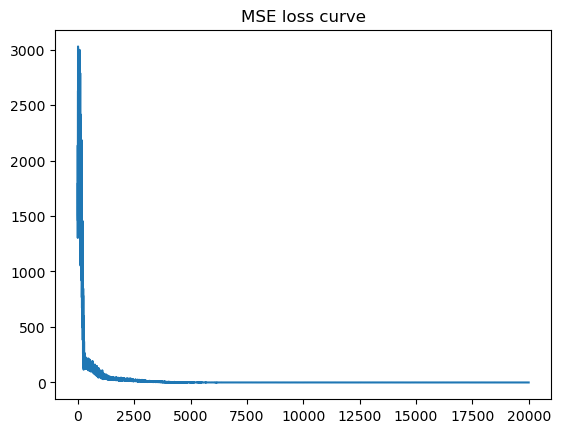

In [5]:
train_params = {
    'epoch_num': 10,
    'iteration_num': 2000,
    'learning_rate': 1e-3,
    'weight_decay': 5e-4,
    'batch_size': 32,
    'device': "cpu"
}

my_network = NeuralNet(num_hidden_layer=2, dim_hidden_layer=8)

train_dataset = create_dataset(500, -10, 10)

my_trainer = NeuralNetTrainer(dataset=train_dataset, network_model=my_network, params=train_params)
my_trainer.run()

### Plot the approximation function

Here, we want to show how accurate the learned non-linear function is. Specifically, we create three datasets that you have to evaluate as follows:

1. One training dataset: it contains all the training data you use to train the model above. (500 samples);
2. One test dataset: it contains 100 test samples with x > 10;
3. One test dataset: it contains 100 test samples with x < -10.

Using the three dataset above, visualize the prediction value as well the ground truth value for all samples in one dataset. Use the "plot_learned_function" in the "NeuralNetTrainer" class above. 

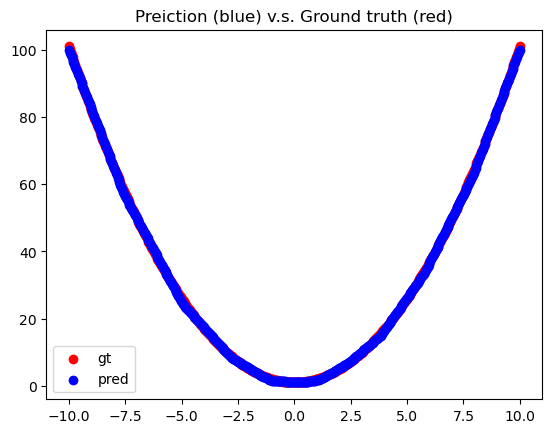

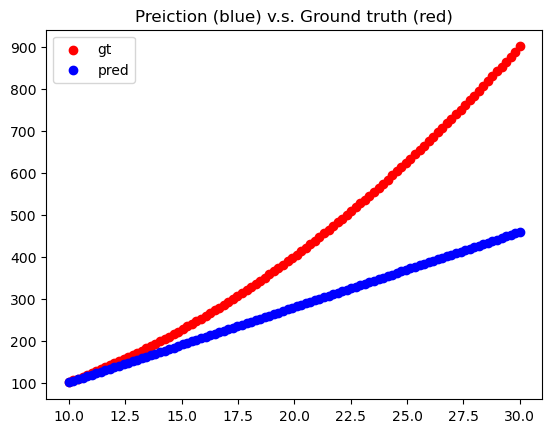

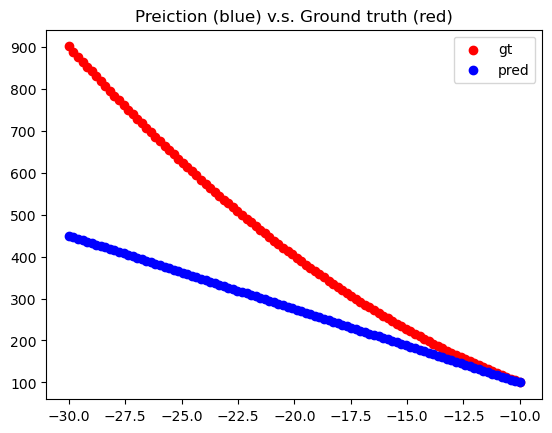

In [6]:
# training dataset to evaluate
train_dataset = create_dataset(500, -10, 10)

# test set 1: one test dataset contains samples with 10 < x < 30
upper_test_dataset = create_dataset(100, 10, 30)

# test set 2: one test dataset contains samples with -30 < x < -10
lower_test_dataset = create_dataset(100, -30, -10)

# Plot your results for all samples in the training set
my_trainer.plot_learned_function(train_dataset)

# Plot your results for all samples in test set 1
my_trainer.plot_learned_function(upper_test_dataset)

# Plot your results for all samples in test set 2
my_trainer.plot_learned_function(lower_test_dataset)

# Q2: DQN with Four Rooms

Here, let's write a DQN agent to resolve the FourRooms problem in this question. 

In [8]:
""" Here is the implementation of the FourRooms
    Note that, the reward function is changed to be:
        - If the agent reaches the goal, it receives 0 and the episode terminates.
        - For other time step, the agent receives -1 reward.
"""
class FourRooms(object):
    def __init__(self):
        # We define the grid for the Four Rooms domain
        self.grid = np.array([[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
                              [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
                              [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                              [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
                              [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
                              [1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0],
                              [0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1],
                              [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
                              [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
                              [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                              [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]])

        # We define the observation space consisting of all empty cells
        # Note: We have to flip the coordinates from (row_idx, column_idx) -> (x, y),
        # where x = column_idx, y = 10 - row_idx
        self.observation_space = np.argwhere(self.grid == 0.0).tolist()  # Fine all empty cells
        self.observation_space = self.arr_coords_to_four_room_coords(self.observation_space)

        # We define the action space
        self.action_space = {'up': np.array([0, 1]),
                             'down': np.array([0, -1]),
                             'left': np.array([-1, 0]),
                             'right': np.array([1, 0])}
        self.action_names = ['up', 'down', 'left', 'right']

        # We define the start location
        self.start_location = [0, 0]

        # We define the goal location
        self.goal_location = [10, 10]

        # We find all wall cells
        self.walls = np.argwhere(self.grid == 1.0).tolist()  # find all wall cells
        self.walls = self.arr_coords_to_four_room_coords(self.walls)  # convert to Four Rooms coordinates

        # This is an episodic task, we define a timeout: maximal time steps = 459
        self.max_time_steps = 459

        # We define other useful variables
        self.agent_location = None  # track the agent's location in one episode.
        self.action = None  # track the agent's action
        self.t = 0  # track the current time step in one episode

    @staticmethod
    def arr_coords_to_four_room_coords(arr_coords_list):
        """
        Function converts the array coordinates to the Four Rooms coordinates (i.e, The origin locates at bottom left).
        E.g., The coordinates (0, 0) in the numpy array is mapped to (0, 10) in the Four Rooms coordinates.
        Args:
            arr_coords_list (list): a list variable consists of tuples of locations in the numpy array

        Return:
            four_room_coords_list (list): a list variable consists of tuples of converted locations in the
                                          Four Rooms environment.
        """
        # Note: We have to flip the coordinates from (row_idx, column_idx) -> (x, y),
        # where x = column_idx, y = 10 - row_idx
        four_room_coords_list = [(column_idx, 10 - row_idx) for (row_idx, column_idx) in arr_coords_list]
        return four_room_coords_list

    def reset(self):
        # We reset the agent's location to the start location
        self.agent_location = self.start_location

        # We reset the timeout tracker to be 0
        self.t = 0

        # We set the information
        info = {}
        return self.agent_location, info

    def step(self, action):
        """
        Args:
            action (string): a string variable (i.e., "UP"). All feasible values are ["up", "down", "left", "right"].
        """
        # With probability 0.8, the agent takes the correct direction.
        # With probability 0.2, the agent takes one of the two perpendicular actions.
        # For example, if the correct action is "LEFT", then
        #     - With probability 0.8, the agent takes action "LEFT";
        #     - With probability 0.1, the agent takes action "UP";
        #     - With probability 0.1, the agent takes action "DOWN".
        if np.random.uniform() < 0.2:
            if action == "left" or action == "right":
                action = np.random.choice(["up", "down"], 1)[0]
            else:
                action = np.random.choice(["right", "left"], 1)[0]

        # Convert the agent's location to array
        loc_arr = np.array(self.agent_location)

        # Convert the action name to movement array
        act_arr = self.action_space[action]

        # Compute the agent's next location
        next_agent_location = np.clip(loc_arr + act_arr,
                                      a_min=np.array([0, 0]),
                                      a_max=np.array([10, 10])).tolist()

        # Check if the agent crashes into walls, it stays at the current location.
        if tuple(next_agent_location) in self.walls:
            next_agent_location = self.agent_location

        """Note that, the reward function is changed as follows.
        """
        # Compute the reward
        reward = 0.0 if next_agent_location == self.goal_location else -1.0

        # Check the termination
        # If the agent reaches the goal, reward = 0, done = True
        # If the time steps reaches the maximal number, reward = -1, done = True.
        if reward == 0.0 or self.t == self.max_time_steps:
            terminated = True
        else:
            terminated = False

        # Update the agent's location, action and time step trackers
        self.agent_location = next_agent_location
        self.action = action
        self.t += 1

        return next_agent_location, reward, terminated, False, {}

    def render(self):
        # plot the agent and the goal
        # empty cell = 0
        # wall cell = 1
        # agent cell = 2
        # goal cell = 3
        plot_arr = self.grid.copy()
        plot_arr[10 - self.agent_location[1], self.agent_location[0]] = 2
        plot_arr[10 - self.goal_location[1], self.goal_location[0]] = 3
        plt.clf()
        plt.title(f"state={self.agent_location}, act={self.action}")
        plt.imshow(plot_arr)
        plt.show(block=False)
        plt.pause(0.1)

    @staticmethod
    def test():
        my_env = FourRooms()
        state, _ = my_env.reset()

        for _ in range(100):
            action = np.random.choice(list(my_env.action_space.keys()), 1)[0]

            next_state, reward, done, _, _ = my_env.step(action)
            my_env.render()

            if done:
                state, _ = my_env.reset()
            else:
                state = next_state

## Define a Deep Q network

Before, we write a DQN agent. Let's define a Deep Q network as we did in Q1. Otherwise, you could also adapt your
implementation above.

In [9]:
# customized weight initialization
def customized_weights_init(m):
    # compute the gain
    gain = nn.init.calculate_gain('relu')
    # init the convolutional layer
    if isinstance(m, nn.Conv2d):
        # init the params using uniform
        nn.init.xavier_uniform_(m.weight, gain=gain)
        nn.init.constant_(m.bias, 0)
    # init the linear layer
    if isinstance(m, nn.Linear):
        # init the params using uniform
        nn.init.xavier_uniform_(m.weight, gain=gain)
        nn.init.constant_(m.bias, 0)

In [10]:
class DeepQNet(nn.Module):
    def __init__(self, input_dim, num_hidden_layer, dim_hidden_layer, output_dim):
        super(DeepQNet, self).__init__()
        
        # define the input dimension
        self.input_dim = input_dim
        # define the number of the hidden layers
        self.hidden_num = num_hidden_layer
        # define the hidden dimension
        self.hidden_dim = dim_hidden_layer
        # define the output dimension
        self.output_dim = output_dim

        # define the input linear layer here
        self.input = nn.Linear(self.input_dim, self.hidden_dim)
        # define the activation function after the input layer (use the ReLU as the activation function)
        self.fc0 = nn.ReLU()
        # define the first hidden layer here
        self.hl0 = nn.Linear(self.hidden_dim, self.hidden_dim)
        # define the activation function after the first hidden layer (use the ReLU as the activation function)
        self.fc1 = nn.ReLU()
        # define the second hidden layer here
        self.hl1 = nn.Linear(self.hidden_dim, self.hidden_dim)
        # define the activation function after the second hidden layer (use the ReLU as the activation function)
        self.fc2 = nn.ReLU()
        # define the output layer here
        self.output = nn.Linear(self.hidden_dim, self.output_dim)        

    def forward(self, x):
        """CODE HERE: implement your forward propagation
        """
        # forward x through the input layer
        x = self.input(x)
        # apply activation
        x = self.fc0(x)
        # forward x throught the first hidden layer
        x = self.hl0(x)
        # apply activation
        x = self.fc1(x)
        # forward x throught the second hidden layer
        x = self.hl1(x)
        # apply activation
        x = self.fc2(x)
        # forward x throught the output layer
        y = self.output(x)
        return y

## Define a Experience Replay Buffer

One main contribution of DQN is proposing to use the replay buffer. Here is the implementation of a simple replay buffer as a list of transitions (i.e., [(s, a, r, s', d), ....]). 

In [11]:
class ReplayBuffer(object):
    """ Implement the Replay Buffer as a class, which contains:
            - self._data_buffer (list): a list variable to store all transition tuples.
            - add: a function to add new transition tuple into the buffer
            - sample_batch: a function to sample a batch training data from the Replay Buffer
    """
    def __init__(self, buffer_size):
        """Args:
               buffer_size (int): size of the replay buffer
        """
        # total size of the replay buffer
        self.total_size = buffer_size

        # create a list to store the transitions
        self._data_buffer = []
        self._next_idx = 0

    def __len__(self):
        return len(self._data_buffer)

    def add(self, obs, act, reward, next_obs, done):
        # create a tuple
        trans = (obs, act, reward, next_obs, done)

        # interesting implementation
        if self._next_idx >= len(self._data_buffer):
            self._data_buffer.append(trans)
        else:
            self._data_buffer[self._next_idx] = trans

        # increase the index
        self._next_idx = (self._next_idx + 1) % self.total_size

    def _encode_sample(self, indices):
        """ Function to fetch the state, action, reward, next state, and done arrays.
        
            Args:
                indices (list): list contains the index of all sampled transition tuples.
        """
        # lists for transitions
        obs_list, actions_list, rewards_list, next_obs_list, dones_list = [], [], [], [], []

        # collect the data
        for idx in indices:
            # get the single transition
            data = self._data_buffer[idx]
            obs, act, reward, next_obs, d = data
            # store to the list
            obs_list.append(np.array(obs, copy=False))
            actions_list.append(np.array(act, copy=False))
            rewards_list.append(np.array(reward, copy=False))
            next_obs_list.append(np.array(next_obs, copy=False))
            dones_list.append(np.array(d, copy=False))
        # return the sampled batch data as numpy arrays
        return np.array(obs_list), np.array(actions_list), np.array(rewards_list), np.array(next_obs_list), np.array(
            dones_list)

    def sample_batch(self, batch_size):
        """ Args:
                batch_size (int): size of the sampled batch data.
        """
        # sample indices with replaced
        indices = [np.random.randint(0, len(self._data_buffer)) for _ in range(batch_size)]
        return self._encode_sample(indices)

## Define a shedule for epsilon-greedy policy

Here, we define a shedule function to return the epsilon for each time step t. 

In [12]:
class LinearSchedule(object):
    """ This schedule returns the value linearly"""
    def __init__(self, start_value, end_value, duration):
        # start value
        self._start_value = start_value
        # end value
        self._end_value = end_value
        # time steps that value changes from the start value to the end value
        self._duration = duration
        # difference between the start value and the end value
        self._schedule_amount = end_value - start_value

    def get_value(self, time):
        # logic: if time > duration, use the end value, else use the scheduled value
        """ CODE HERE: return the epsilon for each time step within the duration.
        """
        if time > self._duration:
            return self._end_value
        else:
            return ((time/self._duration)*self._schedule_amount) + self._start_value

## Define the DQN agent

In [13]:
class DQNAgent(object):
    # initialize the agent
    def __init__(self,
                 params,
                 ):
        # save the parameters
        self.params = params

        # environment parameters
        self.action_dim = params['action_dim']
        self.obs_dim = params['observation_dim']

        # executable actions
        self.action_space = params['action_space']

        # create value network
        self.behavior_policy_net = DeepQNet(input_dim=params['observation_dim'],
                                   num_hidden_layer=params['hidden_layer_num'],
                                   dim_hidden_layer=params['hidden_layer_dim'],
                                   output_dim=params['action_dim'])
        # create target network
        self.target_policy_net = DeepQNet(input_dim=params['observation_dim'],
                                          num_hidden_layer=params['hidden_layer_num'],
                                          dim_hidden_layer=params['hidden_layer_dim'],
                                          output_dim=params['action_dim'])

        # initialize target network with behavior network
        self.behavior_policy_net.apply(customized_weights_init)
        self.target_policy_net.load_state_dict(self.behavior_policy_net.state_dict())

        # send the agent to a specific device: cpu or gpu
        self.device = torch.device("cpu")
        self.behavior_policy_net.to(self.device)
        self.target_policy_net.to(self.device)

        # optimizer
        self.optimizer = torch.optim.Adam(self.behavior_policy_net.parameters(), lr=params['learning_rate'])

    # get action
    def get_action(self, obs, eps):
        if np.random.random() < eps:  # with probability eps, the agent selects a random action
            action = np.random.choice(self.action_space, 1)[0]
            return action
        else:  # with probability 1 - eps, the agent selects a greedy policy
            obs = self._arr_to_tensor(obs).view(1, -1)
            with torch.no_grad():
                q_values = self.behavior_policy_net(obs)
                action = q_values.max(dim=1)[1].item()
            return self.action_space[int(action)]

    # update behavior policy
    def update_behavior_policy(self, batch_data):
        # convert batch data to tensor and put them on device
        batch_data_tensor = self._batch_to_tensor(batch_data)

        # get the transition data
        obs_tensor = batch_data_tensor['obs']
        actions_tensor = batch_data_tensor['action']
        next_obs_tensor = batch_data_tensor['next_obs']
        rewards_tensor = batch_data_tensor['reward']
        dones_tensor = batch_data_tensor['done']

        """CODE HERE:
                Compute the predicted Q values using the behavior policy network
        """
        # compute the q value estimation using the behavior network
        predicted_targets = self.behavior_policy_net(obs_tensor).gather(1,actions_tensor)
        # compute the TD target using the target network
        with torch.no_grad():
            labels_next = self.behavior_policy_net(next_obs_tensor).max(1)[0].unsqueeze(1)
        labels = rewards_tensor + (self.params['gamma']* labels_next*(1-dones_tensor))
        # compute the loss
        td_loss = nn.MSELoss()(predicted_targets, labels).to(self.device)
        # minimize the loss
        self.optimizer.zero_grad()
        td_loss.backward()
        self.optimizer.step()

        return td_loss.item()

    # update update target policy
    def update_target_policy(self):
        # hard update
        """CODE HERE: 
                Copy the behavior policy network to the target network
        """
        self.target_policy_net.load_state_dict(self.behavior_policy_net.state_dict())

    # auxiliary functions
    def _arr_to_tensor(self, arr):
        arr = np.array(arr)
        arr_tensor = torch.from_numpy(arr).float().to(self.device)
        return arr_tensor

    def _batch_to_tensor(self, batch_data):
        # store the tensor
        batch_data_tensor = {'obs': [], 'action': [], 'reward': [], 'next_obs': [], 'done': []}
        # get the numpy arrays
        obs_arr, action_arr, reward_arr, next_obs_arr, done_arr = batch_data
        # convert to tensors
        batch_data_tensor['obs'] = torch.tensor(obs_arr, dtype=torch.float32).to(self.device)
        batch_data_tensor['action'] = torch.tensor(action_arr).long().view(-1, 1).to(self.device)
        batch_data_tensor['reward'] = torch.tensor(reward_arr, dtype=torch.float32).view(-1, 1).to(self.device)
        batch_data_tensor['next_obs'] = torch.tensor(next_obs_arr, dtype=torch.float32).to(self.device)
        batch_data_tensor['done'] = torch.tensor(done_arr, dtype=torch.float32).view(-1, 1).to(self.device)

        return batch_data_tensor

## Define the training process

In [22]:
def train_dqn_agent(env, params):
    # create the DQN agent
    my_agent = DQNAgent(params)

    # create the epsilon-greedy schedule
    my_schedule = LinearSchedule(start_value=params['epsilon_start_value'],
                                 end_value=params['epsilon_end_value'],
                                 duration=params['epsilon_duration'])

    # create the replay buffer
    replay_buffer = ReplayBuffer(params['replay_buffer_size'])

    # training variables
    episode_t = 0
    rewards = []
    train_returns = []
    train_loss = []
    loss = 0

    # reset the environment
    obs, _ = env.reset()

    # start training
    pbar = tqdm.trange(params['total_training_time_step'])
    last_best_return = 0
    for t in pbar:
        # scheduled epsilon at time step t
        eps_t = my_schedule.get_value(t)
        # get one epsilon-greedy action
        action = my_agent.get_action(obs, eps_t)

        # step in the environment
        next_obs, reward, done, _, _ = env.step(action)

        # add to the buffer
        replay_buffer.add(obs, env.action_names.index(action), reward, next_obs, done)
        rewards.append(reward)

        # check termination
        if done:
            # compute the return
            G = 0
            for r in reversed(rewards):
                G = r + params['gamma'] * G

            if G > last_best_return:
                torch.save(my_agent.behavior_policy_net.state_dict(), f"./{params['model_name']}")

            # store the return
            train_returns.append(G)
            episode_idx = len(train_returns)

            # print the information
            pbar.set_description(
                f"Ep={episode_idx} | "
                f"G={np.mean(train_returns[-10:]) if train_returns else 0:.2f} | "
                f"Eps={eps_t}"
            )

            # reset the environment
            episode_t, rewards = 0, []
            obs, _ = env.reset()
        else:
            # increment
            obs = next_obs
            episode_t += 1

        if t > params['start_training_step']:
            # update the behavior model
            if not np.mod(t, params['freq_update_behavior_policy']):
                """ CODE HERE:
                    Update the behavior policy network
                """
                loss = my_agent.update_behavior_policy(replay_buffer.sample_batch(my_agent.params['batch_size']))
                train_loss.append(loss)
                
            # update the target model
            if not np.mod(t, params['freq_update_target_policy']):
                """ CODE HERE:
                    Update the behavior policy network
                """
                my_agent.update_target_policy()
                
    # save the results
    return train_returns, train_loss

## Run experiment

In [23]:
def plot_curves(arr_list, legend_list, color_list, ylabel, fig_title):
    """
    Args:
        arr_list (list): list of results arrays to plot
        legend_list (list): list of legends corresponding to each result array
        color_list (list): list of color corresponding to each result array
        ylabel (string): label of the Y axis

        Note that, make sure the elements in the arr_list, legend_list and color_list are associated with each other correctly.
        Do not forget to change the ylabel for different plots.
    """
    # set the figure type
    fig, ax = plt.subplots(figsize=(12, 8))

    # PLEASE NOTE: Change the labels for different plots
    ax.set_ylabel(ylabel)
    ax.set_xlabel("Time Steps")

    # ploth results
    h_list = []
    for arr, legend, color in zip(arr_list, legend_list, color_list):
        # compute the standard error
        arr_err = arr.std(axis=0) / np.sqrt(arr.shape[0])
        # plot the mean
        h, = ax.plot(range(arr.shape[1]), arr.mean(axis=0), color=color, label=legend)
        # plot the confidence band
        arr_err *= 1.96
        ax.fill_between(range(arr.shape[1]), arr.mean(axis=0) - arr_err, arr.mean(axis=0) + arr_err, alpha=0.3,
                        color=color)
        # save the plot handle
        h_list.append(h)

    # plot legends
    ax.set_title(f"{fig_title}")
    ax.legend(handles=h_list)

    plt.show()

In [24]:
if __name__ == '__main__':
    # set the random seed
    np.random.seed(1234)
    random.seed(1234)
    torch.manual_seed(1234)

    # create environment
    my_env = FourRooms()

    # create training parameters
    train_parameters = {
        'observation_dim': 2,
        'action_dim': 4,
        'action_space': my_env.action_names,
        'hidden_layer_num': 2,
        'hidden_layer_dim': 128,
        'gamma': 0.99,

        'total_training_time_step': 500_000,

        'epsilon_start_value': 1.0,
        'epsilon_end_value': 0.01,
        'epsilon_duration': 250_000,

        'replay_buffer_size': 50000,
        'start_training_step': 2000,
        'freq_update_behavior_policy': 4,
        'freq_update_target_policy': 2000,

        'batch_size': 32,
        'learning_rate': 1e-3,

        'model_name': "four_room.pt"
    }

    # create experiment
    train_returns, train_loss = train_dqn_agent(my_env, train_parameters)

Ep=13512 | G=-22.57 | Eps=0.01: 100%|█████████████████████████████████████████| 500000/500000 [09:18<00:00, 895.16it/s]


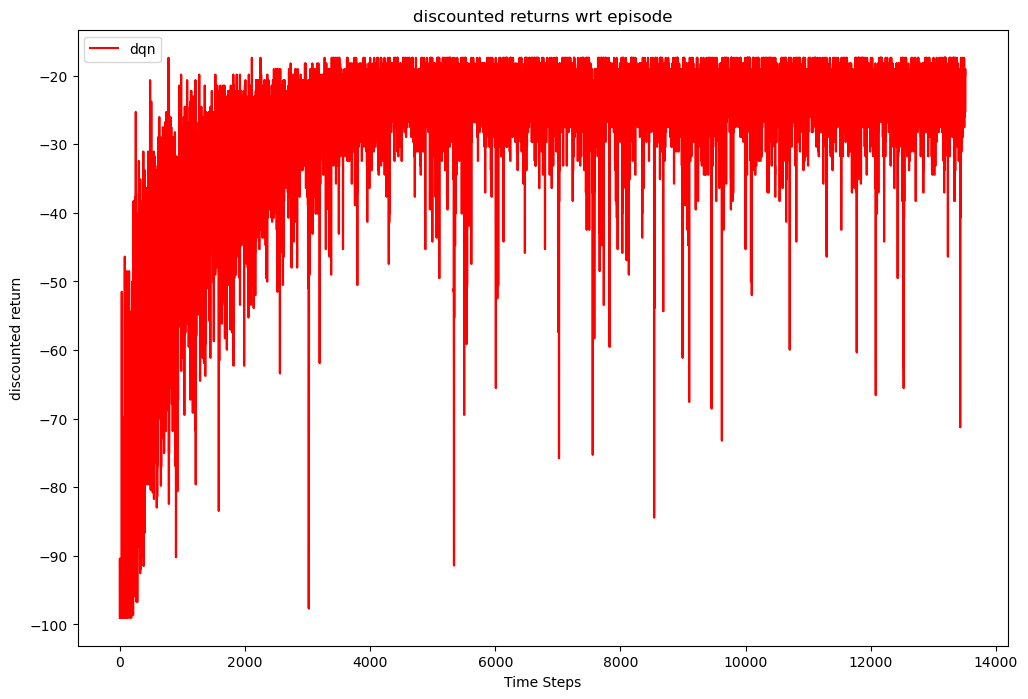

In [25]:
plot_curves([np.array([train_returns])], ['dqn'], ['r'], 'discounted return', 'discounted returns wrt episode')

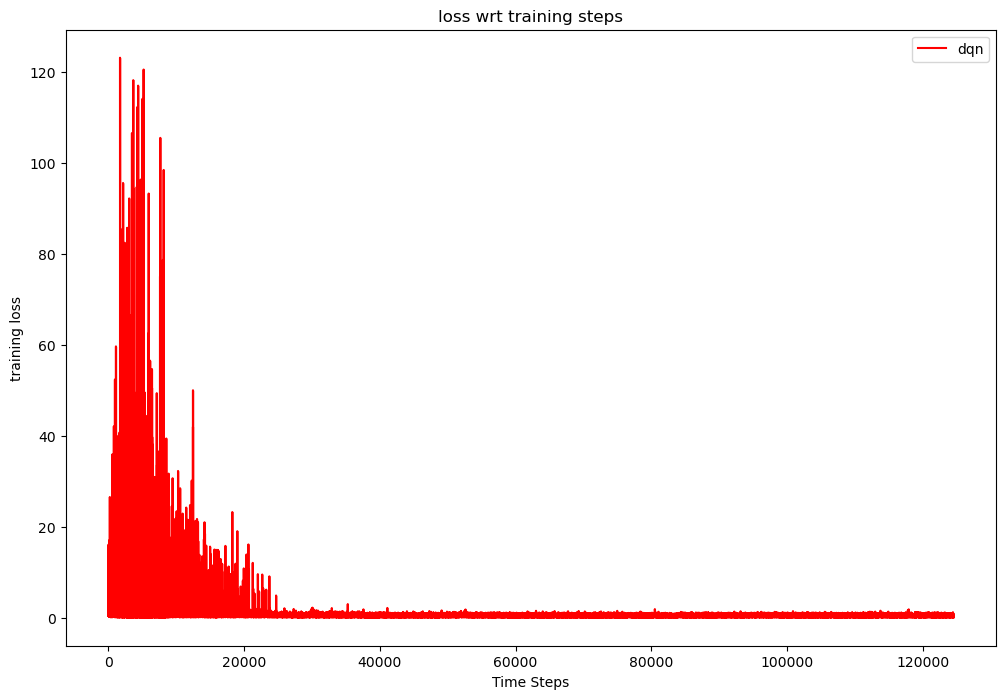

In [26]:
plot_curves([np.array([train_loss])], ['dqn'], ['r'], 'training loss', 'loss wrt training steps')

# Q2: DQN with Four Rooms - Double Q-learning

In [27]:
class Double_DQNAgent(object):
    # initialize the agent
    def __init__(self,
                 params,
                 ):
        # save the parameters
        self.params = params

        # environment parameters
        self.action_dim = params['action_dim']
        self.obs_dim = params['observation_dim']

        # executable actions
        self.action_space = params['action_space']

        # create value network
        self.behavior_policy_net_1= DeepQNet(input_dim=params['observation_dim'],
                                       num_hidden_layer=params['hidden_layer_num'],
                                       dim_hidden_layer=params['hidden_layer_dim'],
                                       output_dim=params['action_dim'])
        self.behavior_policy_net_2= DeepQNet(input_dim=params['observation_dim'],
                                       num_hidden_layer=params['hidden_layer_num'],
                                       dim_hidden_layer=params['hidden_layer_dim'],
                                       output_dim=params['action_dim'])
        # create target network
        self.target_policy_net = DeepQNet(input_dim=params['observation_dim'],
                                          num_hidden_layer=params['hidden_layer_num'],
                                          dim_hidden_layer=params['hidden_layer_dim'],
                                          output_dim=params['action_dim'])

        # initialize target network with behavior network
        self.behavior_policy_net_1.apply(customized_weights_init)
        self.behavior_policy_net_2.apply(customized_weights_init)
        self.target_policy_net.load_state_dict(self.behavior_policy_net_1.state_dict())

        # send the agent to a specific device: cpu or gpu
        self.device = torch.device("cpu")
        self.behavior_policy_net_1.to(self.device)
        self.behavior_policy_net_2.to(self.device)
        self.target_policy_net.to(self.device)

        # optimizer
        self.optimizer_1 = torch.optim.Adam(self.behavior_policy_net_1.parameters(), lr=params['learning_rate'])
        self.optimizer_2 = torch.optim.Adam(self.behavior_policy_net_2.parameters(), lr=params['learning_rate'])

    # get action according to the double Q-learning algorithm
    def get_action(self, obs, eps):
        if np.random.random() < eps:  # with probability eps, the agent selects a random action
            action = np.random.choice(self.action_space, 1)[0]
            return action
        else:  # with probability 1 - eps, the agent selects a greedy policy
            obs = self._arr_to_tensor(obs).view(1, -1)
            with torch.no_grad():
                q_values_1 = self.behavior_policy_net_1(obs)
                q_values_2 = self.behavior_policy_net_2(obs)
                q_values = q_values_1 + q_values_2
                action = q_values.max(dim=1)[1].item()
            return self.action_space[int(action)]

    # update behavior policy
    def update_behavior_policy(self, batch_data):
        # convert batch data to tensor and put them on device
        batch_data_tensor = self._batch_to_tensor(batch_data)

        # get the transition data
        obs_tensor = batch_data_tensor['obs']
        actions_tensor = batch_data_tensor['action']
        next_obs_tensor = batch_data_tensor['next_obs']
        rewards_tensor = batch_data_tensor['reward']
        dones_tensor = batch_data_tensor['done']

        """CODE HERE:
                Compute the predicted Q values using the behavior policy network
        """
        if np.random.random() < 0.5:
            # compute the q value estimation using the behavior network
            predicted_targets = self.behavior_policy_net_1(obs_tensor).gather(1,actions_tensor)
            # compute the TD target using the target network
            with torch.no_grad():
                # Select argmax action
                _, actions = self.behavior_policy_net_1(obs_tensor).max(dim=1, keepdim=True)
                labels_next = self.behavior_policy_net_2(next_obs_tensor).gather(dim=1, index=actions)
            labels = rewards_tensor + (self.params['gamma']* labels_next*(1-dones_tensor))
            # compute the loss
            td_loss = nn.MSELoss()(predicted_targets, labels).to(self.device)
            # minimize the loss
            self.optimizer_1.zero_grad()
            td_loss.backward()
            self.optimizer_1.step()
        else:
            # compute the q value estimation using the behavior network
            predicted_targets = self.behavior_policy_net_2(obs_tensor).gather(1,actions_tensor)
            # compute the TD target using the target network
            with torch.no_grad():
                # Select argmax action
                _, actions = self.behavior_policy_net_2(obs_tensor).max(dim=1, keepdim=True)
                labels_next = self.behavior_policy_net_1(next_obs_tensor).gather(dim=1, index=actions)
            labels = rewards_tensor + (self.params['gamma']* labels_next*(1-dones_tensor))
            # compute the loss
            td_loss = nn.MSELoss()(predicted_targets, labels).to(self.device)
            # minimize the loss
            self.optimizer_2.zero_grad()
            td_loss.backward()
            self.optimizer_2.step()
        return td_loss.item()

    # update update target policy
    def update_target_policy(self):
        # hard update
        """CODE HERE: 
                Copy the behavior policy network to the target network
        """
        self.target_policy_net.load_state_dict(self.behavior_policy_net_1.state_dict())

    # auxiliary functions
    def _arr_to_tensor(self, arr):
        arr = np.array(arr)
        arr_tensor = torch.from_numpy(arr).float().to(self.device)
        return arr_tensor

    def _batch_to_tensor(self, batch_data):
        # store the tensor
        batch_data_tensor = {'obs': [], 'action': [], 'reward': [], 'next_obs': [], 'done': []}
        # get the numpy arrays
        obs_arr, action_arr, reward_arr, next_obs_arr, done_arr = batch_data
        # convert to tensors
        batch_data_tensor['obs'] = torch.tensor(obs_arr, dtype=torch.float32).to(self.device)
        batch_data_tensor['action'] = torch.tensor(action_arr).long().view(-1, 1).to(self.device)
        batch_data_tensor['reward'] = torch.tensor(reward_arr, dtype=torch.float32).view(-1, 1).to(self.device)
        batch_data_tensor['next_obs'] = torch.tensor(next_obs_arr, dtype=torch.float32).to(self.device)
        batch_data_tensor['done'] = torch.tensor(done_arr, dtype=torch.float32).view(-1, 1).to(self.device)

        return batch_data_tensor

In [28]:
def train_double_dqn_agent(env, params):
    # create the Double_DQN agent
    my_agent = Double_DQNAgent(params)

    # create the epsilon-greedy schedule
    my_schedule = LinearSchedule(start_value=params['epsilon_start_value'],
                                 end_value=params['epsilon_end_value'],
                                 duration=params['epsilon_duration'])

    # create the replay buffer
    replay_buffer = ReplayBuffer(params['replay_buffer_size'])

    # training variables
    episode_t = 0
    rewards = []
    train_returns = []
    train_loss = []
    loss = 0

    # reset the environment
    obs, _ = env.reset()

    # start training
    pbar = tqdm.trange(params['total_training_time_step'])
    last_best_return = 0
    for t in pbar:
        # scheduled epsilon at time step t
        eps_t = my_schedule.get_value(t)
        # get one epsilon-greedy action
        action = my_agent.get_action(obs, eps_t)

        # step in the environment
        next_obs, reward, done, _, _ = env.step(action)

        # add to the buffer
        replay_buffer.add(obs, env.action_names.index(action), reward, next_obs, done)
        rewards.append(reward)

        # check termination
        if done:
            # compute the return
            G = 0
            for r in reversed(rewards):
                G = r + params['gamma'] * G

            if G > last_best_return:
                torch.save(my_agent.behavior_policy_net.state_dict(), f"./{params['model_name']}")

            # store the return
            train_returns.append(G)
            episode_idx = len(train_returns)

            # print the information
            pbar.set_description(
                f"Ep={episode_idx} | "
                f"G={np.mean(train_returns[-10:]) if train_returns else 0:.2f} | "
                f"Eps={eps_t}"
            )

            # reset the environment
            episode_t, rewards = 0, []
            obs, _ = env.reset()
        else:
            # increment
            obs = next_obs
            episode_t += 1

        if t > params['start_training_step']:
            # update the behavior model
            if not np.mod(t, params['freq_update_behavior_policy']):
                """ CODE HERE:
                    Update the behavior policy network
                """
                loss = my_agent.update_behavior_policy(replay_buffer.sample_batch(my_agent.params['batch_size']))
                train_loss.append(loss)
                
            # update the target model
            if not np.mod(t, params['freq_update_target_policy']):
                """ CODE HERE:
                    Update the behavior policy network
                """
                my_agent.update_target_policy()
                
    # save the results
    return train_returns, train_loss

In [29]:
if __name__ == '__main__':
    # set the random seed
    np.random.seed(1234)
    random.seed(1234)
    torch.manual_seed(1234)

    # create environment
    my_env = FourRooms()

    # create training parameters
    train_parameters = {
        'observation_dim': 2,
        'action_dim': 4,
        'action_space': my_env.action_names,
        'hidden_layer_num': 2,
        'hidden_layer_dim': 128,
        'gamma': 0.99,

        'total_training_time_step': 500_000,

        'epsilon_start_value': 1.0,
        'epsilon_end_value': 0.01,
        'epsilon_duration': 250_000,

        'replay_buffer_size': 50000,
        'start_training_step': 2000,
        'freq_update_behavior_policy': 4,
        'freq_update_target_policy': 2000,

        'batch_size': 32,
        'learning_rate': 1e-3,

        'model_name': "four_room.pt"
    }

    # create experiment
    train_returns_1, train_loss_1 = train_double_dqn_agent(my_env, train_parameters)

Ep=12809 | G=-21.52 | Eps=0.01: 100%|█████████████████████████████████████████| 500000/500000 [09:32<00:00, 872.96it/s]


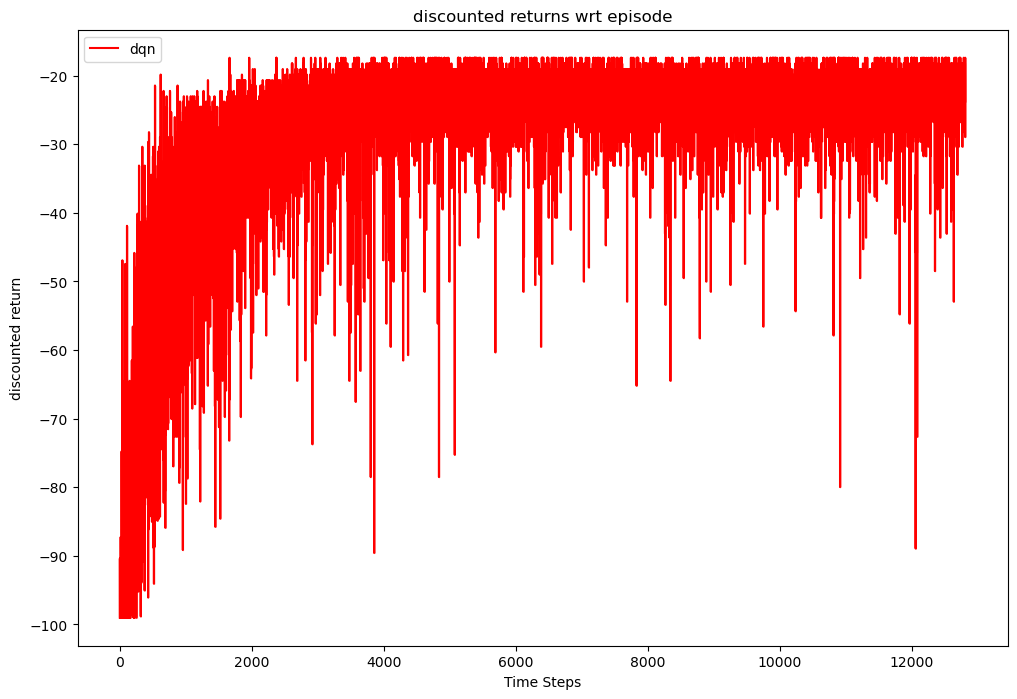

In [30]:
plot_curves([np.array([train_returns_1])], ['dqn'], ['r'], 'discounted return', 'discounted returns wrt episode')

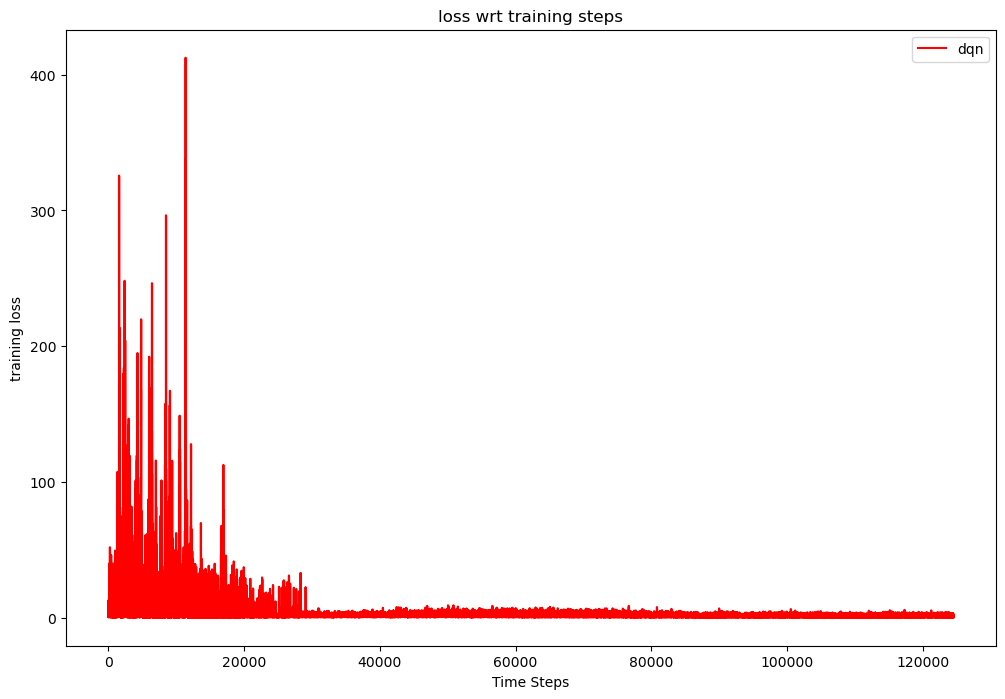

In [31]:
plot_curves([np.array([train_loss_1])], ['dqn'], ['r'], 'training loss', 'loss wrt training steps')

 # Q3: DQN with Classic Controls - CartPole
 
In this question, we will exam our implementation in two classic control tasks in gym. Due to the slight difference between the action spaces of the FourRooms and the CartPole/LunarLander, we have to modify the DQNAgent and the training function a little bit. But, you do NOT have to modify the code according to such change. Just complete the code as previously. 

In [32]:
class DQNAgent(object):
    # initialize the agent
    def __init__(self,
                 params,
                 ):
        # save the parameters
        self.params = params

        # environment parameters
        self.action_dim = params['action_dim']
        self.obs_dim = params['observation_dim']

        # executable actions
        self.action_space = params['action_space']

        # create behavior policy network
        self.behavior_policy_net = DeepQNet(input_dim=params['observation_dim'],
                                            num_hidden_layer=params['hidden_layer_num'],
                                            dim_hidden_layer=params['hidden_layer_dim'],
                                            output_dim=params['action_dim'])
        # create target network
        self.target_policy_net = DeepQNet(input_dim=params['observation_dim'],
                                          num_hidden_layer=params['hidden_layer_num'],
                                          dim_hidden_layer=params['hidden_layer_dim'],
                                          output_dim=params['action_dim'])

        # initialize target network with behavior network
        self.behavior_policy_net.apply(customized_weights_init)
        self.target_policy_net.load_state_dict(self.behavior_policy_net.state_dict())

        # send the agent to a specific device: cpu or gpu
        self.device = torch.device("cpu")
        self.behavior_policy_net.to(self.device)
        self.target_policy_net.to(self.device)

        # optimizer
        self.optimizer = torch.optim.Adam(self.behavior_policy_net.parameters(), lr=params['learning_rate'])

    # get action
    def get_action(self, obs, eps):
        if np.random.random() < eps:  # with probability eps, the agent selects a random action
            action = self.action_space.sample()
        else:  # with probability 1 - eps, the agent selects a greedy policy
            obs = self._arr_to_tensor(obs).view(1, -1)
            with torch.no_grad():
                q_values = self.behavior_policy_net(obs)
                action = q_values.max(dim=1)[1].item()
        return action

    # update behavior policy
    def update_behavior_policy(self, batch_data):
        # convert batch data to tensor and put them on device
        batch_data_tensor = self._batch_to_tensor(batch_data)

        # get the transition data
        obs_tensor = batch_data_tensor['obs']
        actions_tensor = batch_data_tensor['action']
        next_obs_tensor = batch_data_tensor['next_obs']
        rewards_tensor = batch_data_tensor['reward']
        dones_tensor = batch_data_tensor['done']

        """CODE HERE:
                Compute the predicted Q values using the behavior policy network
        """
        # compute the q value estimation using the behavior network
        predicted_targets = self.behavior_policy_net(obs_tensor).gather(1,actions_tensor)
        # compute the TD target using the target network
        with torch.no_grad():
            labels_next = self.behavior_policy_net(next_obs_tensor).max(1)[0].unsqueeze(1)
        labels = rewards_tensor + (self.params['gamma']* labels_next*(1-dones_tensor))
        # compute the loss
        td_loss = nn.MSELoss()(predicted_targets, labels).to(self.device)
        # minimize the loss
        self.optimizer.zero_grad()
        td_loss.backward()
        self.optimizer.step()

        return td_loss.item()

    # update update target policy
    def update_target_policy(self):
        # hard update
        """CODE HERE: 
                Copy the behavior policy network to the target network
        """
        self.target_policy_net.load_state_dict(self.behavior_policy_net.state_dict())
        
    # load trained model
    def load_model(self, model_file):
        # load the trained model
        self.behavior_policy_net.load_state_dict(torch.load(model_file, map_location=self.device))
        self.behavior_policy_net.eval()

    # auxiliary functions
    def _arr_to_tensor(self, arr):
        arr = np.array(arr)
        arr_tensor = torch.from_numpy(arr).float().to(self.device)
        return arr_tensor

    def _batch_to_tensor(self, batch_data):
        # store the tensor
        batch_data_tensor = {'obs': [], 'action': [], 'reward': [], 'next_obs': [], 'done': []}
        # get the numpy arrays
        obs_arr, action_arr, reward_arr, next_obs_arr, done_arr = batch_data
        # convert to tensors
        batch_data_tensor['obs'] = torch.tensor(obs_arr, dtype=torch.float32).to(self.device)
        batch_data_tensor['action'] = torch.tensor(action_arr).long().view(-1, 1).to(self.device)
        batch_data_tensor['reward'] = torch.tensor(reward_arr, dtype=torch.float32).view(-1, 1).to(self.device)
        batch_data_tensor['next_obs'] = torch.tensor(next_obs_arr, dtype=torch.float32).to(self.device)
        batch_data_tensor['done'] = torch.tensor(done_arr, dtype=torch.float32).view(-1, 1).to(self.device)

        return batch_data_tensor

In [33]:
def train_dqn_agent(env, params):
    # create the DQN agent
    my_agent = DQNAgent(params)

    # create the epsilon-greedy schedule
    my_schedule = LinearSchedule(start_value=params['epsilon_start_value'],
                                 end_value=params['epsilon_end_value'],
                                 duration=params['epsilon_duration'])

    # create the replay buffer
    replay_buffer = ReplayBuffer(params['replay_buffer_size'])

    # training variables
    episode_t = 0
    rewards = []
    train_returns = []
    train_loss = []
    loss = 0

    # reset the environment
    obs, _ = env.reset()

    # start training
    pbar = tqdm.trange(params['total_training_time_step'])
    last_best_return = 0
    for t in pbar:
        # scheduled epsilon at time step t
        eps_t = my_schedule.get_value(t)
        # get one epsilon-greedy action
        action = my_agent.get_action(obs, eps_t)

        # step in the environment
        next_obs, reward, done, _, _ = env.step(action)

        # add to the buffer
        replay_buffer.add(obs, action, reward, next_obs, done)
        rewards.append(reward)

        # check termination
        if done or episode_t == params['max_time_step_per_episode'] - 1:
            # compute the return
            G = 0
            for r in reversed(rewards):
                G = r + params['gamma'] * G

            if G > last_best_return:
                torch.save(my_agent.behavior_policy_net.state_dict(), f"./{params['model_name']}")

            # store the return
            train_returns.append(G)
            episode_idx = len(train_returns)

            # print the information
            pbar.set_description(
                f"Ep={episode_idx} | "
                f"G={np.mean(train_returns[-10:]) if train_returns else 0:.2f} | "
                f"Eps={eps_t}"
            )

            # reset the environment
            episode_t, rewards = 0, []
            obs, _ = env.reset()
        else:
            # increment
            obs = next_obs
            episode_t += 1

        if t > params['start_training_step']:
            # update the behavior model
            if not np.mod(t, params['freq_update_behavior_policy']):
                """ CODE HERE:
                    Update the behavior policy network
                """
                loss = my_agent.update_behavior_policy(replay_buffer.sample_batch(my_agent.params['batch_size']))
                train_loss.append(loss)

            # update the target model
            if not np.mod(t, params['freq_update_target_policy']):
                """ CODE HERE:
                    Update the behavior policy network
                """
                my_agent.update_target_policy()

    # save the results
    return train_returns, train_loss

In [44]:
if __name__ == '__main__':
    # set the random seed
    np.random.seed(1234)
    random.seed(1234)
    torch.manual_seed(1234)

    # create environment
    my_env = gym.make("CartPole-v0")

    # create training parameters
    train_parameters = {
        'observation_dim': 4,
        'action_dim': 2,
        'action_space': my_env.action_space,
        'hidden_layer_num': 2,
        'hidden_layer_dim': 128,
        'gamma': 0.9995,
        
        'max_time_step_per_episode': 200,

        'total_training_time_step': 1_000_000,

        'epsilon_start_value': 1.0,
        'epsilon_end_value': 0.01,
        'epsilon_duration': 500_000,

        'replay_buffer_size': 500_000,
        'start_training_step': 2000,
        'freq_update_behavior_policy': 4,
        'freq_update_target_policy': 2000,

        'batch_size': 64,
        'learning_rate': 1e-3,

        'model_name': "cartpole_v1.pt"
    }

    # create experiment
    train_returns, train_loss = train_dqn_agent(my_env, train_parameters)

Ep=9744 | G=190.37 | Eps=0.01: 100%|████████████████████████████████████████| 1000000/1000000 [17:03<00:00, 976.59it/s]


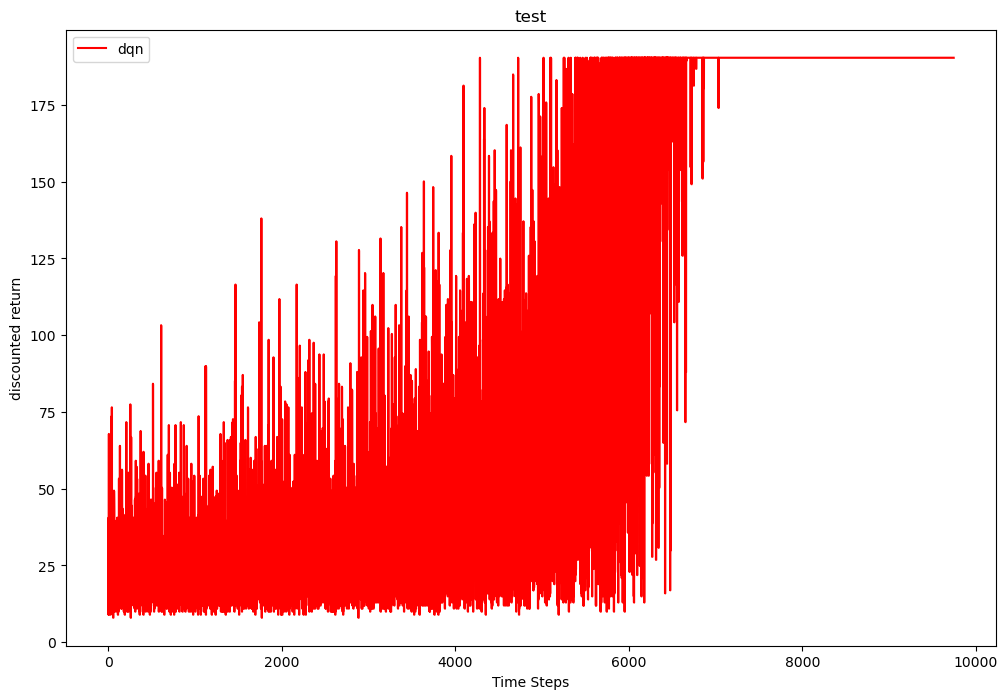

In [45]:
plot_curves([np.array([train_returns])], ['dqn'], ['r'], 'discounted return', 'test')

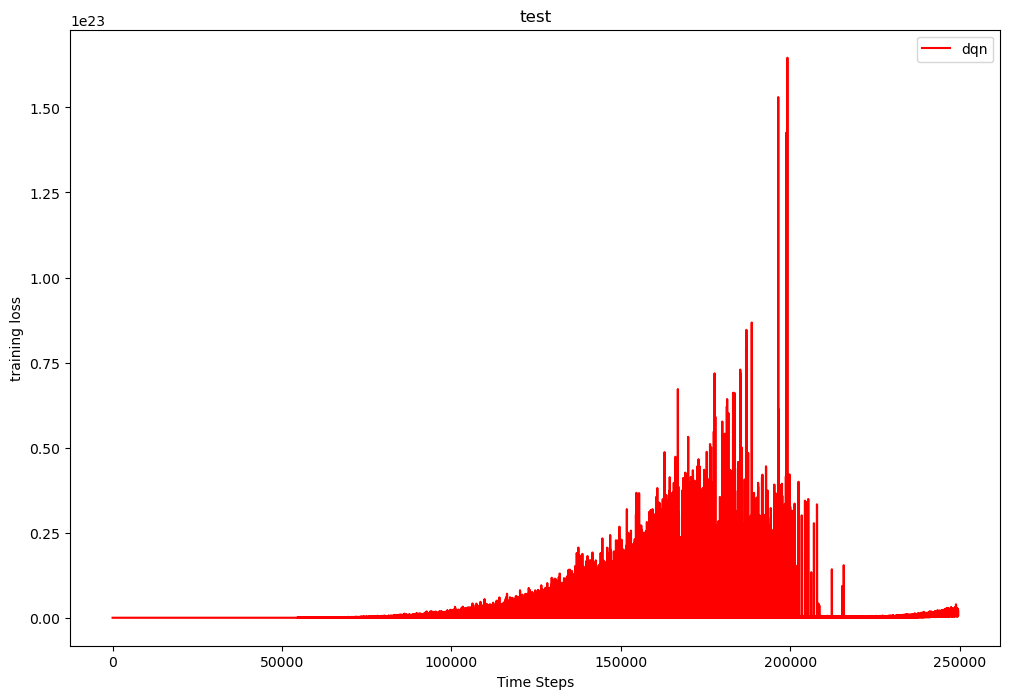

In [46]:
plot_curves([np.array([train_loss])], ['dqn'], ['r'], 'training loss', 'test')

## Q3 DQN with Classic Controls - LunarLander

In [40]:
if __name__ == '__main__':
    # set the random seed
    np.random.seed(1234)
    random.seed(1234)
    torch.manual_seed(1234)

    # create environment
    my_env = gym.make("LunarLander-v2")

    # create training parameters
    train_parameters = {
        'observation_dim': 8,
        'action_dim': 4,
        'action_space': my_env.action_space,
        'hidden_layer_num': 2,
        'hidden_layer_dim': 128,
        'gamma': 0.99,
        
        'max_time_step_per_episode': 1000,

        'total_training_time_step': 500000,

        'epsilon_start_value': 1.0,
        'epsilon_end_value': 0.01,
        'epsilon_duration': 500_000,

        'replay_buffer_size': 50000,
        'start_training_step': 2000,
        'freq_update_behavior_policy': 4,
        'freq_update_target_policy': 2000,

        'batch_size': 32,
        'learning_rate': 1e-3,

        'model_name': "lunar_lander.pt"
    }

    # create experiment
    train_returns, train_loss = train_dqn_agent(my_env, train_parameters)

Ep=4161 | G=-339.73 | Eps=0.010003960000000034: 100%|████████████████████████| 500000/500000 [08:18<00:00, 1002.07it/s]


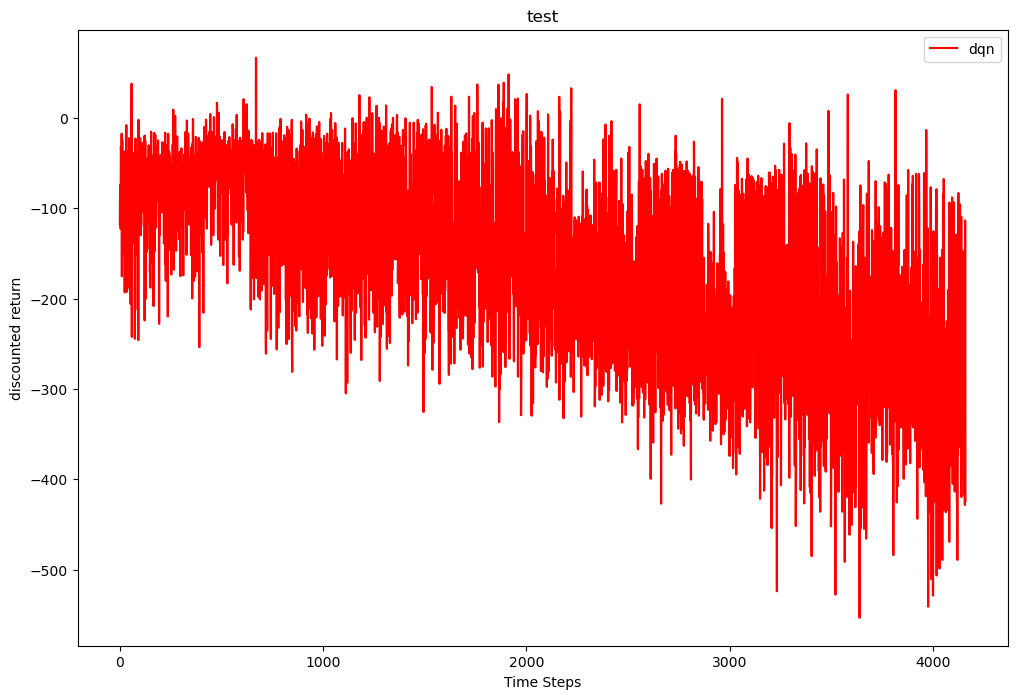

In [41]:
plot_curves([np.array([train_returns])], ['dqn'], ['r'], 'discounted return', 'test')

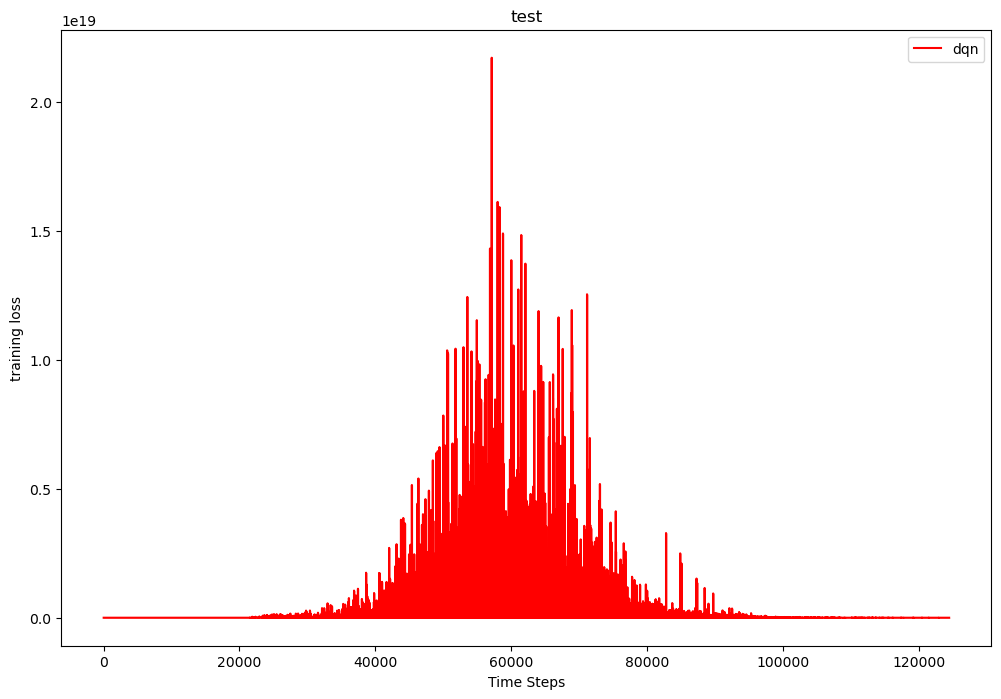

In [42]:
plot_curves([np.array([train_loss])], ['dqn'], ['r'], 'training loss', 'test')

# Q4 Extra Credit, DQN with Atari.

In [ ]:
""" Implement your code here """